<h1>Tests for trying to plot satellite imagery</h1

First, I tried to use world view to download image of Antarctica.  I can download it from the webpage , but it only let's me use 1 km resoultion.  I need to find a way to download entire image.   Probably with gdal?, but there could be other ways.  It is basically a clean view of Antarctica put together over many passes of MODIS images. 

https://worldview.earthdata.nasa.gov/?v=-4839088.99831366,-2761595.0354131535,5921317.126475548,2499948.357504216&p=antarctic&t=2016-01-19-T00%3A00%3A00Z&l=MODIS_Terra_Land_Surface_Temp_Day,Coastlines,BlueMarble_ShadedRelief_Bathymetry

<h2> Example plotting the tiff image with Rasterio

In [1]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import os

In [13]:
print('Worldview image')
filepath = '/home/jovyan/shared/data-showard/snapshot-2016-01-19T00_00_00Z.tiff'
with rasterio.open(filepath) as src:
    print(src.profile)

Worldview image
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 5392, 'height': 4616, 'count': 3, 'crs': CRS.from_epsg(3031), 'transform': Affine(1024.0, 0.0, -2650112.0,
       0.0, -1024.0, 2351104.0), 'tiled': False, 'compress': 'deflate', 'interleave': 'pixel'}


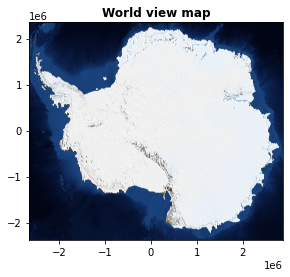

In [3]:

with rasterio.open(filepath) as src:
    rasterio.plot.show(src, title='World view map')
    

We will try this another way

In [4]:
import rasterio
import hvplot
import hvplot.xarray
import xarray as xr

#Read MODIS
dem_fn = filepath
src = rasterio.open(dem_fn)
da = xr.open_rasterio(src)
subplot_width  = int(src.shape[1] /9)
subplot_height = int(src.shape[0] /10)
da.sel(band=1).hvplot.image(rasterize=True,
                            width=subplot_width,
                            height=subplot_height,
                            cmap='gray')

:DynamicMap   []
   :Image   [x,y]   (value)

<h2>original MOA plot</h2>


The original iamgery was from 1 km file

In [5]:
data_root='/srv/tutorial-data/land_ice_applications/'

In [6]:
! cd ..; [ -d pointCollection ] || git clone https://www.github.com/smithB/pointCollection.git
sys.path.append(os.path.join(os.getcwd(), '..'))
import pointCollection as pc

In [7]:

spatial_extent = [31.5, -70.56, 33.73, -69.29]


[-70.56 -69.29 -69.29 -70.56 -70.56]
[33.73 33.73 31.5  31.5  33.73]
{'cmap': 'gray', 'clim': [14000, 17000], 'extent': array([1114050., 1262050., 1773825., 1938825.]), 'origin': 'lower'}


Text(0.5, 1.0, ' Area used for search')

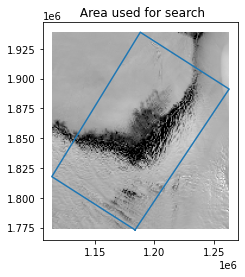

In [11]:


spatial_extent = np.array(spatial_extent)
lat=spatial_extent[[1, 3, 3, 1, 1]]
lon=spatial_extent[[2, 2, 0, 0, 2]]
print(lat)
print(lon)
# project the coordinates to Antarctic polar stereographic
xy=np.array(pyproj.Proj(3031)(lon, lat))
# get the bounds of the projected coordinates 
XR=[np.nanmin(xy[0,:]), np.nanmax(xy[0,:])]
YR=[np.nanmin(xy[1,:]), np.nanmax(xy[1,:])]

#MOA=pc.grid.data().from_geotif(os.path.join(data_root, 'MOA','moa125_2009_hp1_v1.1.tif'), bounds=[XR, YR])
MOA=pc.grid.data().from_geotif(os.path.join(data_root, 'MOA','moa_2009_1km.tif'), bounds=[XR, YR])
# show the mosaic:
plt.figure()
MOA.show(cmap='gray', clim=[14000, 17000])
plt.plot(xy[0,:], xy[1,:])
# This still needs to be fixed in order to properly display the transect on the map
#plt.plot(lon_mean,lat_mean,transform=ccrs.SouthPolarStereo(), c='darkred')
plt.title(' Area used for search')

In [12]:


spatial_extent = np.array(spatial_extent)
lat=spatial_extent[[1, 3, 3, 1, 1]]
lon=spatial_extent[[2, 2, 0, 0, 2]]
print(lat)
print(lon)
# project the coordinates to Antarctic polar stereographic
xy=np.array(pyproj.Proj(3031)(lon, lat))
# get the bounds of the projected coordinates 
XR=[np.nanmin(xy[0,:]), np.nanmax(xy[0,:])]
YR=[np.nanmin(xy[1,:]), np.nanmax(xy[1,:])]

MOA=pc.grid.data().from_geotif(os.path.join(data_root, 'MOA','moa125_2009_hp1_v1.1.tif'), bounds=[XR, YR])
#MOA=pc.grid.data().from_geotif(os.path.join(data_root, 'MOA','moa_2009_1km.tif'), bounds=[XR, YR])
# show the mosaic:
plt.figure()
MOA.show(cmap='gray', clim=[14000, 17000])
plt.plot(xy[0,:], xy[1,:])
# This still needs to be fixed in order to properly display the transect on the map
#plt.plot(lon_mean,lat_mean,transform=ccrs.SouthPolarStereo(), c='darkred')
plt.title(' Area used for search')

[-70.56 -69.29 -69.29 -70.56 -70.56]
[33.73 33.73 31.5  31.5  33.73]


AttributeError: 'NoneType' object has no attribute 'GetGeoTransform'

*******I also tried to use this same reader to read in my tif image from world view above (with different paths, etc, and it does not work either

In [18]:
from osgeo import gdal, osr

gdal.UseExceptions()




ds = gdal.Open(filepath)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print(inproj)

PROJCS["unnamed",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Polar_Stereographic"],
    PARAMETER["latitude_of_origin",-71],
    PARAMETER["central_meridian",0],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1],
    AXIS["Easting",NORTH],
    AXIS["Northing",NORTH]]


In [ ]:
snapshot-2016-01-19T00_00_00Z.tiff